Según el catálogo Yale Bright Star se pueden estimar ...
Archivo ASCII 'catalog.ascii' convertido a 'catalog.csv' con delimitador ','
                                                   0
0     1          BD+44 4550      3 36042         ...
1     2          BD-01 4525      6128569         ...
2     3 33    PscBD-06 6357     281285721002I    ...
3     4 86    PegBD+12 5063     87 917012004     ...
4     5          BD+57 2865    123 21085         ...
5     6          CD-4914337    142214963      W  ...
6     7 10    CasBD+63 2107    144 109782005     ...
7     8          BD+28 4704    166 73743         ...
8     9          CD-23    4    2031660531003     ...
9    10          BD-18 6428    256147090         ...
Cantidad de estrellas BD en el catálogo: 5990
Cantidad de estrellas Psc en el catálogo: 112
Cantidad de estrellas CD en el catálogo: 1999
Cantidad de estrellas And en el catálogo: 76
Cantidad de estrellas Cas en el catálogo: 66
Cantidad de estrellas Peg en el catálogo: 92
Cantidad d

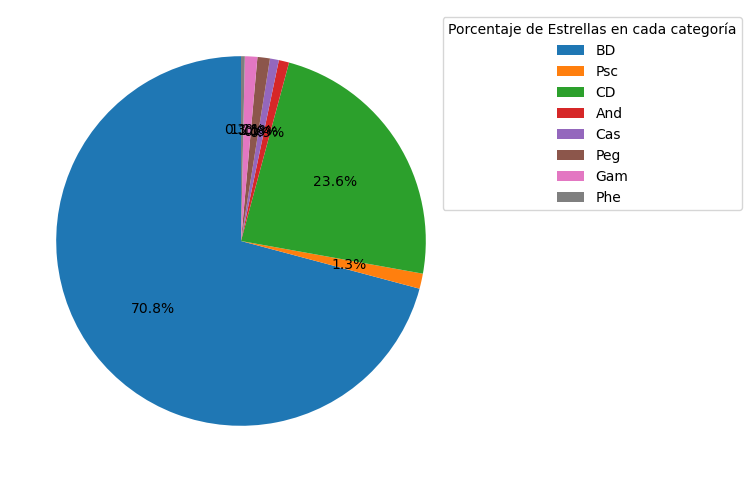

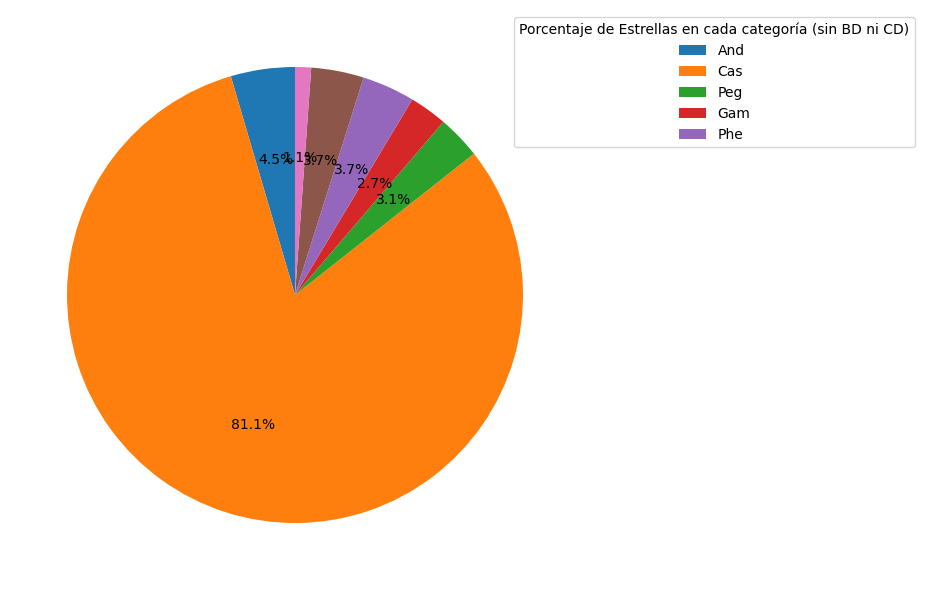

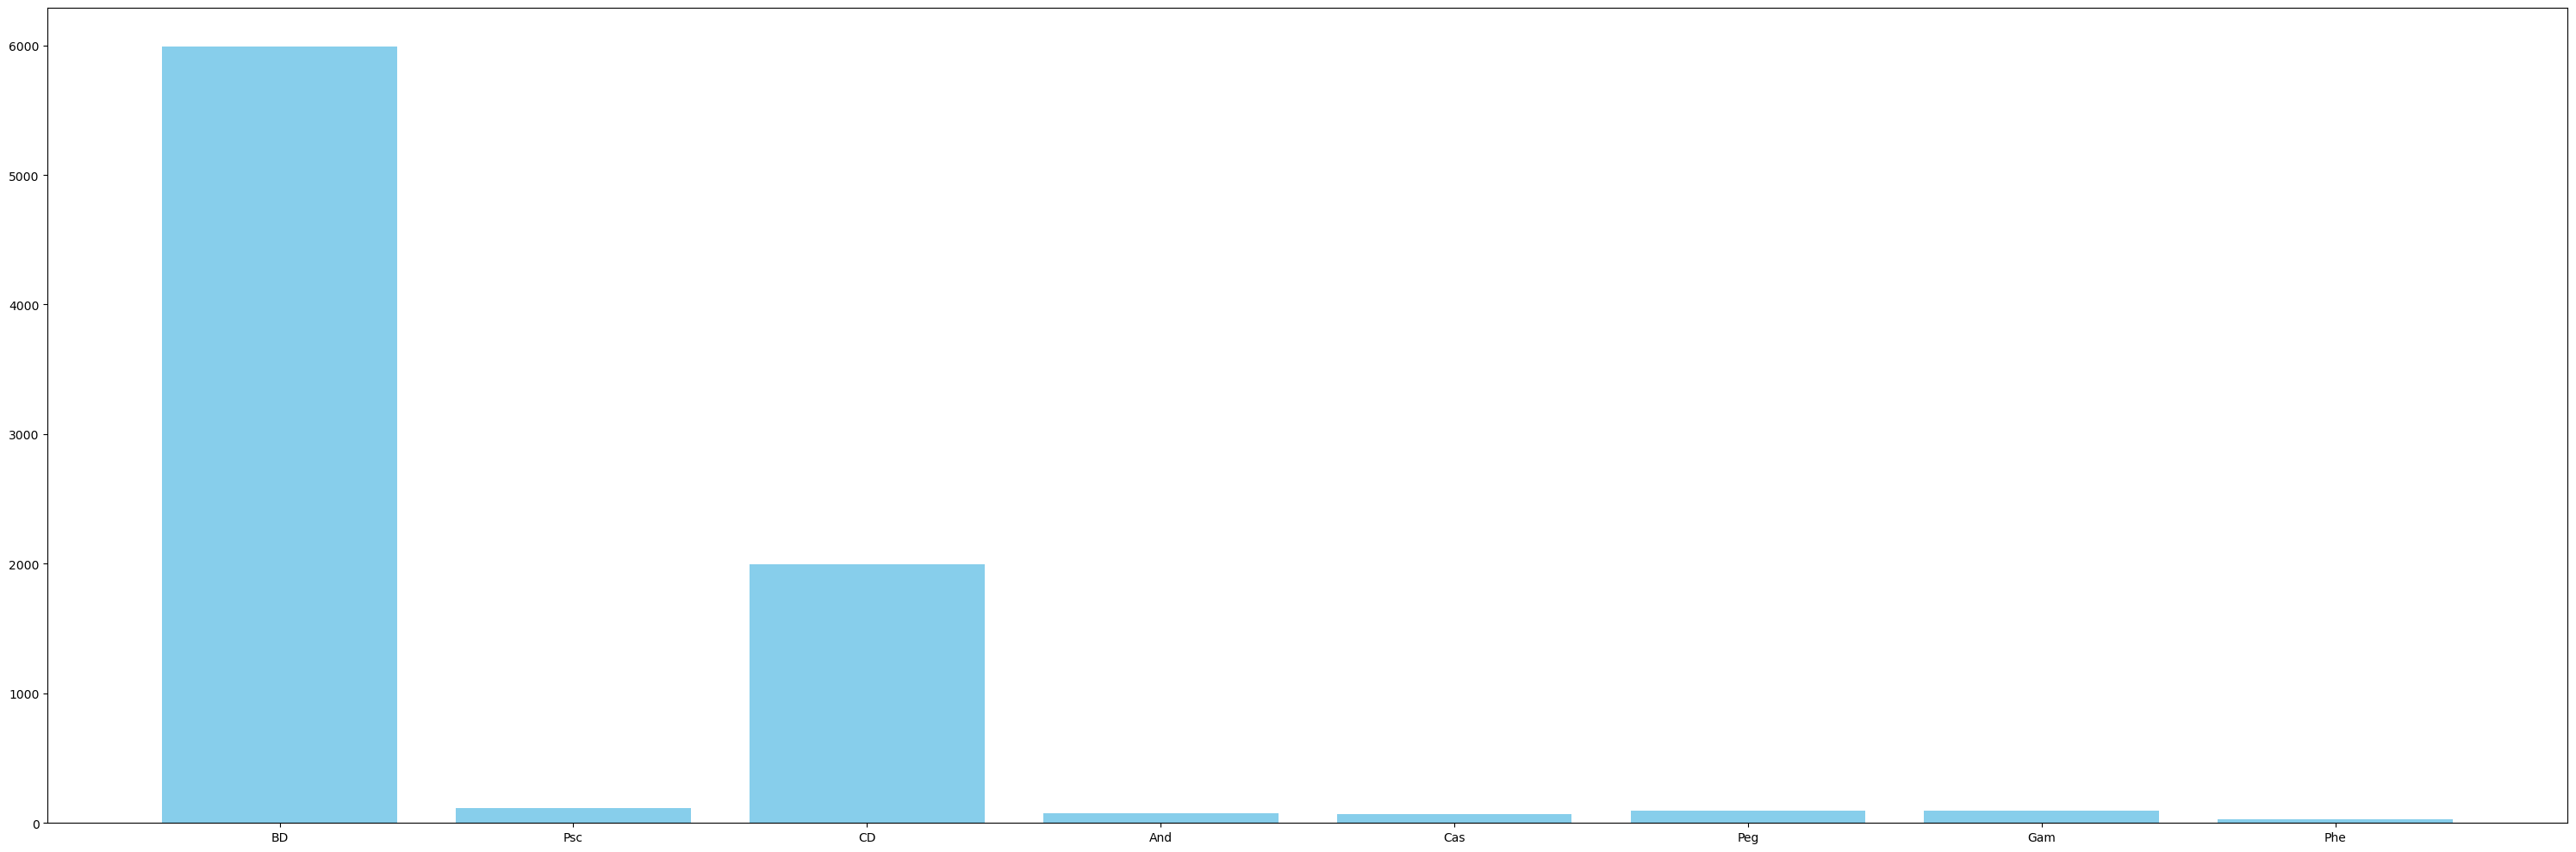

In [120]:
import csv
import matplotlib.pyplot as plt

#Este código fue desarrollado por LauKar
# Vamos a contar la cantidad de estrellas en la Vía Láctea usando  Yale Bright Star Catalog

print("Según el catálogo Yale Bright Star se pueden estimar ...")


# Cargar el catálogo de estrellas ASCII y pasar a CVS

def ascii_to_csv(input_file, output_file, delimiter):
    """
    Convierte un archivo ASCII a CSV.

    Args:
        input_file (str): La ruta al archivo ASCII de entrada.
        output_file (str): La ruta al archivo CSV de salida.
        delimiter (str, optional): El delimitador a usar en el archivo CSV. Defaults to ','.
    """
    try:
        with open(input_file, 'r', encoding='utf-8') as infile, \
             open(output_file, 'w', newline='', encoding='utf-8') as outfile:
            reader = csv.reader(infile, delimiter='\t')  # Asume tabulación como delimitador en ASCII
            writer = csv.writer(outfile, delimiter=delimiter)

            for row in reader:
                writer.writerow(row)

        print(f"Archivo ASCII '{input_file}' convertido a '{output_file}' con delimitador '{delimiter}'")

    except FileNotFoundError:
        print(f"Error: Archivo no encontrado: '{input_file}'")
    except Exception as e:
        print(f"Ocurrió un error durante la conversión: {e}")

input_ascii_file="catalog.ascii"
output_cvs_file="catalog.csv"
delimiter_csv = ','  # Puedes cambiar el delimitador aquí, por ejemplo, ';'
ascii_to_csv(input_ascii_file, output_cvs_file, delimiter_csv)

#Leyendo el archivo CSV
df = pd.read_csv(output_cvs_file, delimiter=delimiter_csv, header=None)
#Mostramos el catalogo de estrellas 
print(df.head(10))

########  Contando tipos de estrellas #######################################
#Vamos a contar la cantidad de estrellas SEGÚN el tipo que está dado en la nomenclatura
def contar_estrellas(df, nomeclature):
    """
    Cuenta la cantidad de estrellas con la nomenclatura pedida dentro del DataFrame.

    Args:
        df (DataFrame): El DataFrame que contiene los datos de las estrellas.

    Returns:
        int: La cantidad de estrellas que son registadas con esa nomenclatura.
    """
    return df.apply(lambda x: x.astype(str).str.contains(nomeclature, case=False)).sum().sum()


#BD
cantidad_estrellas_BD= contar_estrellas(df, 'BD')
print(f"Cantidad de estrellas BD en el catálogo: {cantidad_estrellas_BD}")

#Psc 
cantidad_estrellas_Psc = contar_estrellas(df, 'Psc')
print(f"Cantidad de estrellas Psc en el catálogo: {cantidad_estrellas_Psc}")

#CD
cantidad_estrellas_CD = contar_estrellas(df, 'CD')
print(f"Cantidad de estrellas CD en el catálogo: {cantidad_estrellas_CD}")

#And
cantidad_estrellas_And = contar_estrellas(df, 'And')
print(f"Cantidad de estrellas And en el catálogo: {cantidad_estrellas_And}")

#Cas
cantidad_estrellas_Cas = contar_estrellas(df, 'Cas')
print(f"Cantidad de estrellas Cas en el catálogo: {cantidad_estrellas_Cas}")

#Peg
cantidad_estrellas_Peg = contar_estrellas(df, 'Peg')
print(f"Cantidad de estrellas Peg en el catálogo: {cantidad_estrellas_Peg}")

#Gam
cantidad_estrellas_Gam = contar_estrellas(df, 'Gam')
print(f"Cantidad de estrellas Gam en el catálogo: {cantidad_estrellas_Gam}")

#Phe 
cantidad_estrellas_Phe = contar_estrellas(df, 'Phe')
print(f"Cantidad de estrellas Phe en el catálogo: {cantidad_estrellas_Phe}")

nomenclaturas = ['BD', 'Psc', 'CD', 'And', 'Cas', 'Peg', 'Gam', 'Phe']
cantidades = [cantidad_estrellas_BD, cantidad_estrellas_Psc, cantidad_estrellas_CD, cantidad_estrellas_And, cantidad_estrellas_Cas, cantidad_estrellas_Peg, cantidad_estrellas_Gam, cantidad_estrellas_Phe]
cantidades = np.array(cantidades)

cantidades_sinBD= cantidades[1:]  # Excluimos BD para el gráfico
nomenclaturas_sinBD = nomenclaturas[1:]  # Excluimos BD para el gráfico


#Cantidad total de estrellas
total_estrellas = 0
for cantidad in cantidades:
    total_estrellas  += cantidad
print(f"Cantidad de estrellas en la Vía Láctea según el catálogo Yale Bright Star:", total_estrellas, "estrellas")

# Graficamos el porcentaje de cada tipo de estrellas por nomenclatura
fig=plt.figure( figsize=[10,6])
plt.pie(cantidades, autopct='%1.1f%%', startangle=90)
plt.legend(title='Porcentaje de Estrellas en cada categoría', labels= nomenclaturas, loc='upper right', bbox_to_anchor=(1.6, 1))

#Graficamos las minorias
cantidades_sinBD= cantidades[1:]  # Excluimos BD para el gráfico
nomenclaturas_sinBD = nomenclaturas[1:]  # Excluimos BD para el gráfico

cantidades_sinCD= cantidades_sinBD[2:]  # Tambien Excluimos CD para el gráfico
nomenclaturas_sinCD = nomenclaturas_sinBD[2:]  #excluimos CD para el gráfico

fig2 = plt.figure(figsize=[10,6])
plt.pie(cantidades_sinBD, autopct='%1.1f%%', startangle=90, labels=None)
plt.legend(title='Porcentaje de Estrellas en cada categoría (sin BD ni CD)', labels=nomenclaturas_sinCD, loc='upper right', bbox_to_anchor=(1.6, 1))

fig2.tight_layout()


fig3 = plt.figure(figsize=[30,10])
plt.bar(nomenclaturas, cantidades, color='skyblue') 

fig3.tight_layout()


